## Import Packages

In [1]:
# Original Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Data Collection

### Load Training Dataset

In [2]:
# --- Importing Train Dataset ---
# NSL-KDD, 43 features, 125973 samples, Multiclass Classification (From text file)
KDDTrain = pd.read_csv('KDDTrain+.txt', header = None) # Data with difficulty level
# Column Headings
KDDTrain.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulty']

# We will not utilize the 'difficulty' feature for now
KDDTrain.drop('difficulty', axis=1, inplace=True)

### Load Testing Dataset

In [3]:
# --- Importing Test Dataset ---
# NSL-KDD, 43 features, 22544 samples, Multiclass Classification (From text file)
KDDTest = pd.read_csv('KDDTest+.txt', header = None) # Data with difficulty level
# Column Headings
KDDTest.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulty']

# We will not utilize the 'difficulty' feature for now
KDDTest.drop('difficulty', axis=1, inplace=True)

## Data Analysis

In [4]:
# Used for ensuring dataset integrity and if the data has successfully been cleaned
for i in KDDTrain.columns:
  print('unique values in "{}":\n'.format(i),KDDTrain[i].sort_values(ascending=True).unique()) # Display the unique values in ascending order

unique values in "duration":
 [    0     1     2 ... 42862 42888 42908]
unique values in "protocol_type":
 ['icmp' 'tcp' 'udp']
unique values in "service":
 ['IRC' 'X11' 'Z39_50' 'aol' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf'
 'daytime' 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs'
 'exec' 'finger' 'ftp' 'ftp_data' 'gopher' 'harvest' 'hostnames' 'http'
 'http_2784' 'http_443' 'http_8001' 'imap4' 'iso_tsap' 'klogin' 'kshell'
 'ldap' 'link' 'login' 'mtp' 'name' 'netbios_dgm' 'netbios_ns'
 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u' 'other' 'pm_dump' 'pop_2'
 'pop_3' 'printer' 'private' 'red_i' 'remote_job' 'rje' 'shell' 'smtp'
 'sql_net' 'ssh' 'sunrpc' 'supdup' 'systat' 'telnet' 'tftp_u' 'tim_i'
 'time' 'urh_i' 'urp_i' 'uucp' 'uucp_path' 'vmnet' 'whois']
unique values in "flag":
 ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
unique values in "src_bytes":
 [         0          1          4 ...  693375640 1167519497 1379963888]
unique values in "dst_bytes

unique values in "diff_srv_rate":
 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57
 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.67 0.68 0.69 0.7  0.71 0.72
 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92 0.95 0.96 0.97 0.98 0.99 1.  ]
unique values in "srv_diff_host_rate":
 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.35 0.36 0.37 0.38 0.4  0.41 0.42 0.43
 0.44 0.45 0.46 0.47 0.5  0.54 0.55 0.56 0.57 0.6  0.62 0.67 0.71 0.75
 0.8  0.83 0.88 1.  ]
unique values in "dst_host_count":
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

In [5]:
for i in KDDTest.columns:
  print('unique values in "{}":\n'.format(i),KDDTest[i].sort_values(ascending=True).unique()) # Display the unique values in ascending order

unique values in "duration":
 [    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    35    37    39
    40    41    43    44    48    49    50    54    57    58    59    60
    61    62    63    65    67    69    71    72    73    75    79    84
    89    90    91    92    94    96    99   107   111   112   116   117
   118   126   133   134   135   136   138   140   141   142   148   154
   160   163   171   182   184   192   198   199   205   207   208   214
   218   226   239   242   247   253   277   280   281   282   283   284
   285   287   288   289   293   297   300   314   315   317   345   373
   426   433   440   469   657   684   703   707   718   731   748   774
   781   786   788   789   791   792   794   795   796   798   799   801
   802   803   804   805   806   807   808   809   810   811   812   813
   814   815   816   

In [6]:
KDDTrain

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [7]:
KDDTest

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [8]:
KDDTrain.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
KDDTest.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Zero Statistical Aproach (Feature Selection)

In [10]:
KDDTrain.drop('class',axis=1).columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [11]:
Zeros=[]
for i in KDDTrain.drop('class',axis=1).columns:
  value = KDDTrain[i].value_counts(normalize=True)[0] #
  Zeros.append(value)
X = KDDTrain.drop('class',axis=1).columns
Y = Zeros

In [12]:
for i in range(len(X)):
  print(i, X[i], Y[i])

0 duration 0.9204750224254403
1 protocol_type 0.815166742079652
2 service 0.32021147388726157
3 flag 0.5949290721027521
4 src_bytes 0.39208401800385795
5 dst_bytes 0.5395362498313131
6 land 0.9998015447754678
7 wrong_fragment 0.9913473522103943
8 urgent 0.9999285561191684
9 hot 0.9787970438109753
10 num_failed_logins 0.9990315385042826
11 logged_in 0.6042644058647488
12 num_compromised 0.9897914632500615
13 root_shell 0.9986584426821621
14 su_attempted 0.9993649432814968
15 num_root 0.9948481023711431
16 num_file_creations 0.9977217340223699
17 num_shells 0.9996269041778794
18 num_access_files 0.9970549244679415
19 num_outbound_cmds 1.0
20 is_host_login 0.9999920617910187
21 is_guest_login 0.9905773459392092
22 count 0.00010319671675676534
23 srv_count 0.00010319671675676534
24 serror_rate 0.6892667476363983
25 srv_serror_rate 0.7045477999253809
26 rerror_rate 0.8714803965929208
27 srv_rerror_rate 0.8713533852492201
28 same_srv_rate 0.021957086042247147
29 diff_srv_rate 0.6050264739269

In [13]:
KDDTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [14]:
X = KDDTrain.drop('class',axis=1).columns
Y = Zeros

([<matplotlib.axis.XTick at 0x18369edf1d0>,
 [Text(0.0, 0, 'duration'),
  Text(1.0, 0, 'protocol_type'),
  Text(2.0, 0, 'service'),
  Text(3.0, 0, 'flag'),
  Text(4.0, 0, 'src_bytes'),
  Text(5.0, 0, 'dst_bytes'),
  Text(6.0, 0, 'land'),
  Text(7.0, 0, 'wrong_fragment'),
  Text(8.0, 0, 'urgent'),
  Text(9.0, 0, 'hot'),
  Text(10.0, 0, 'num_failed_logins'),
  Text(11.0, 0, 'logged_in'),
  Text(12.0, 0, 'num_compromised'),
  Text(13.0, 0, 'root_shell'),
  Text(14.0, 0, 'su_attempted'),
  Text(15.0, 0, 'num_root'),
  Text(16.0, 0, 'num_file_creations'),
  Text(17.0, 0, 'num_shells'),
  Text(18.0, 0, 'num_access_files'),
  Text(19.0, 0, 'num_outbound_cmds'),
  Text(20.0, 0, 'is_host_login'),
  Text(21.0, 0, 'is_guest_login'),
  Text(22.0, 0, 'count'),
  Text(23.0, 0, 'srv_count'),
  Text(24.0, 0, 'serror_rate'),
  Text(25.0, 0, 'srv_serror_rate'),
  Text(26.0, 0, 'rerror_rate'),
  Text(27.0, 0, 'srv_rerror_rate'),
  Text(28.0, 0, 'same_srv_rate'),
  Text(29.0, 0, 'diff_srv_rate'),
  Text(3

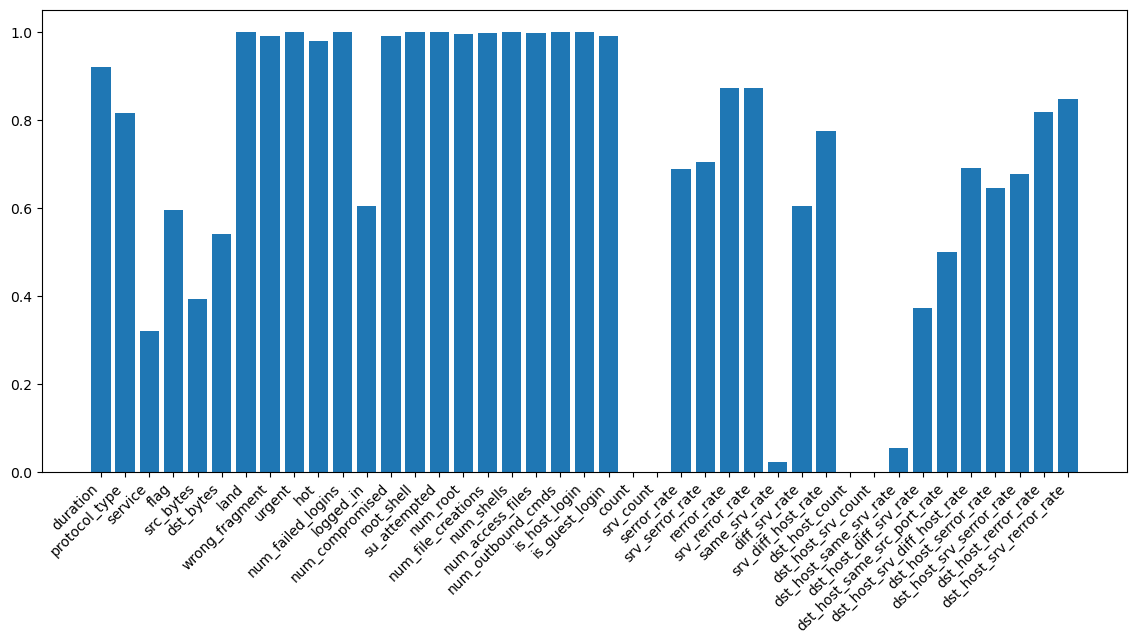

In [15]:
plt.figure(figsize=(14, 6))

plt.bar(X, Y)
# Rotation of the bars names
plt.xticks(X, X, rotation=45, ha='right')

In [16]:
# Define a threshold for color differentiation (e.g., 80%)
threshold = 1.0

# Create a list of colors based on the values
colors=[]
for i in Y:
  if i >= threshold:
    colors.append('red')
  else:
    colors.append('green')

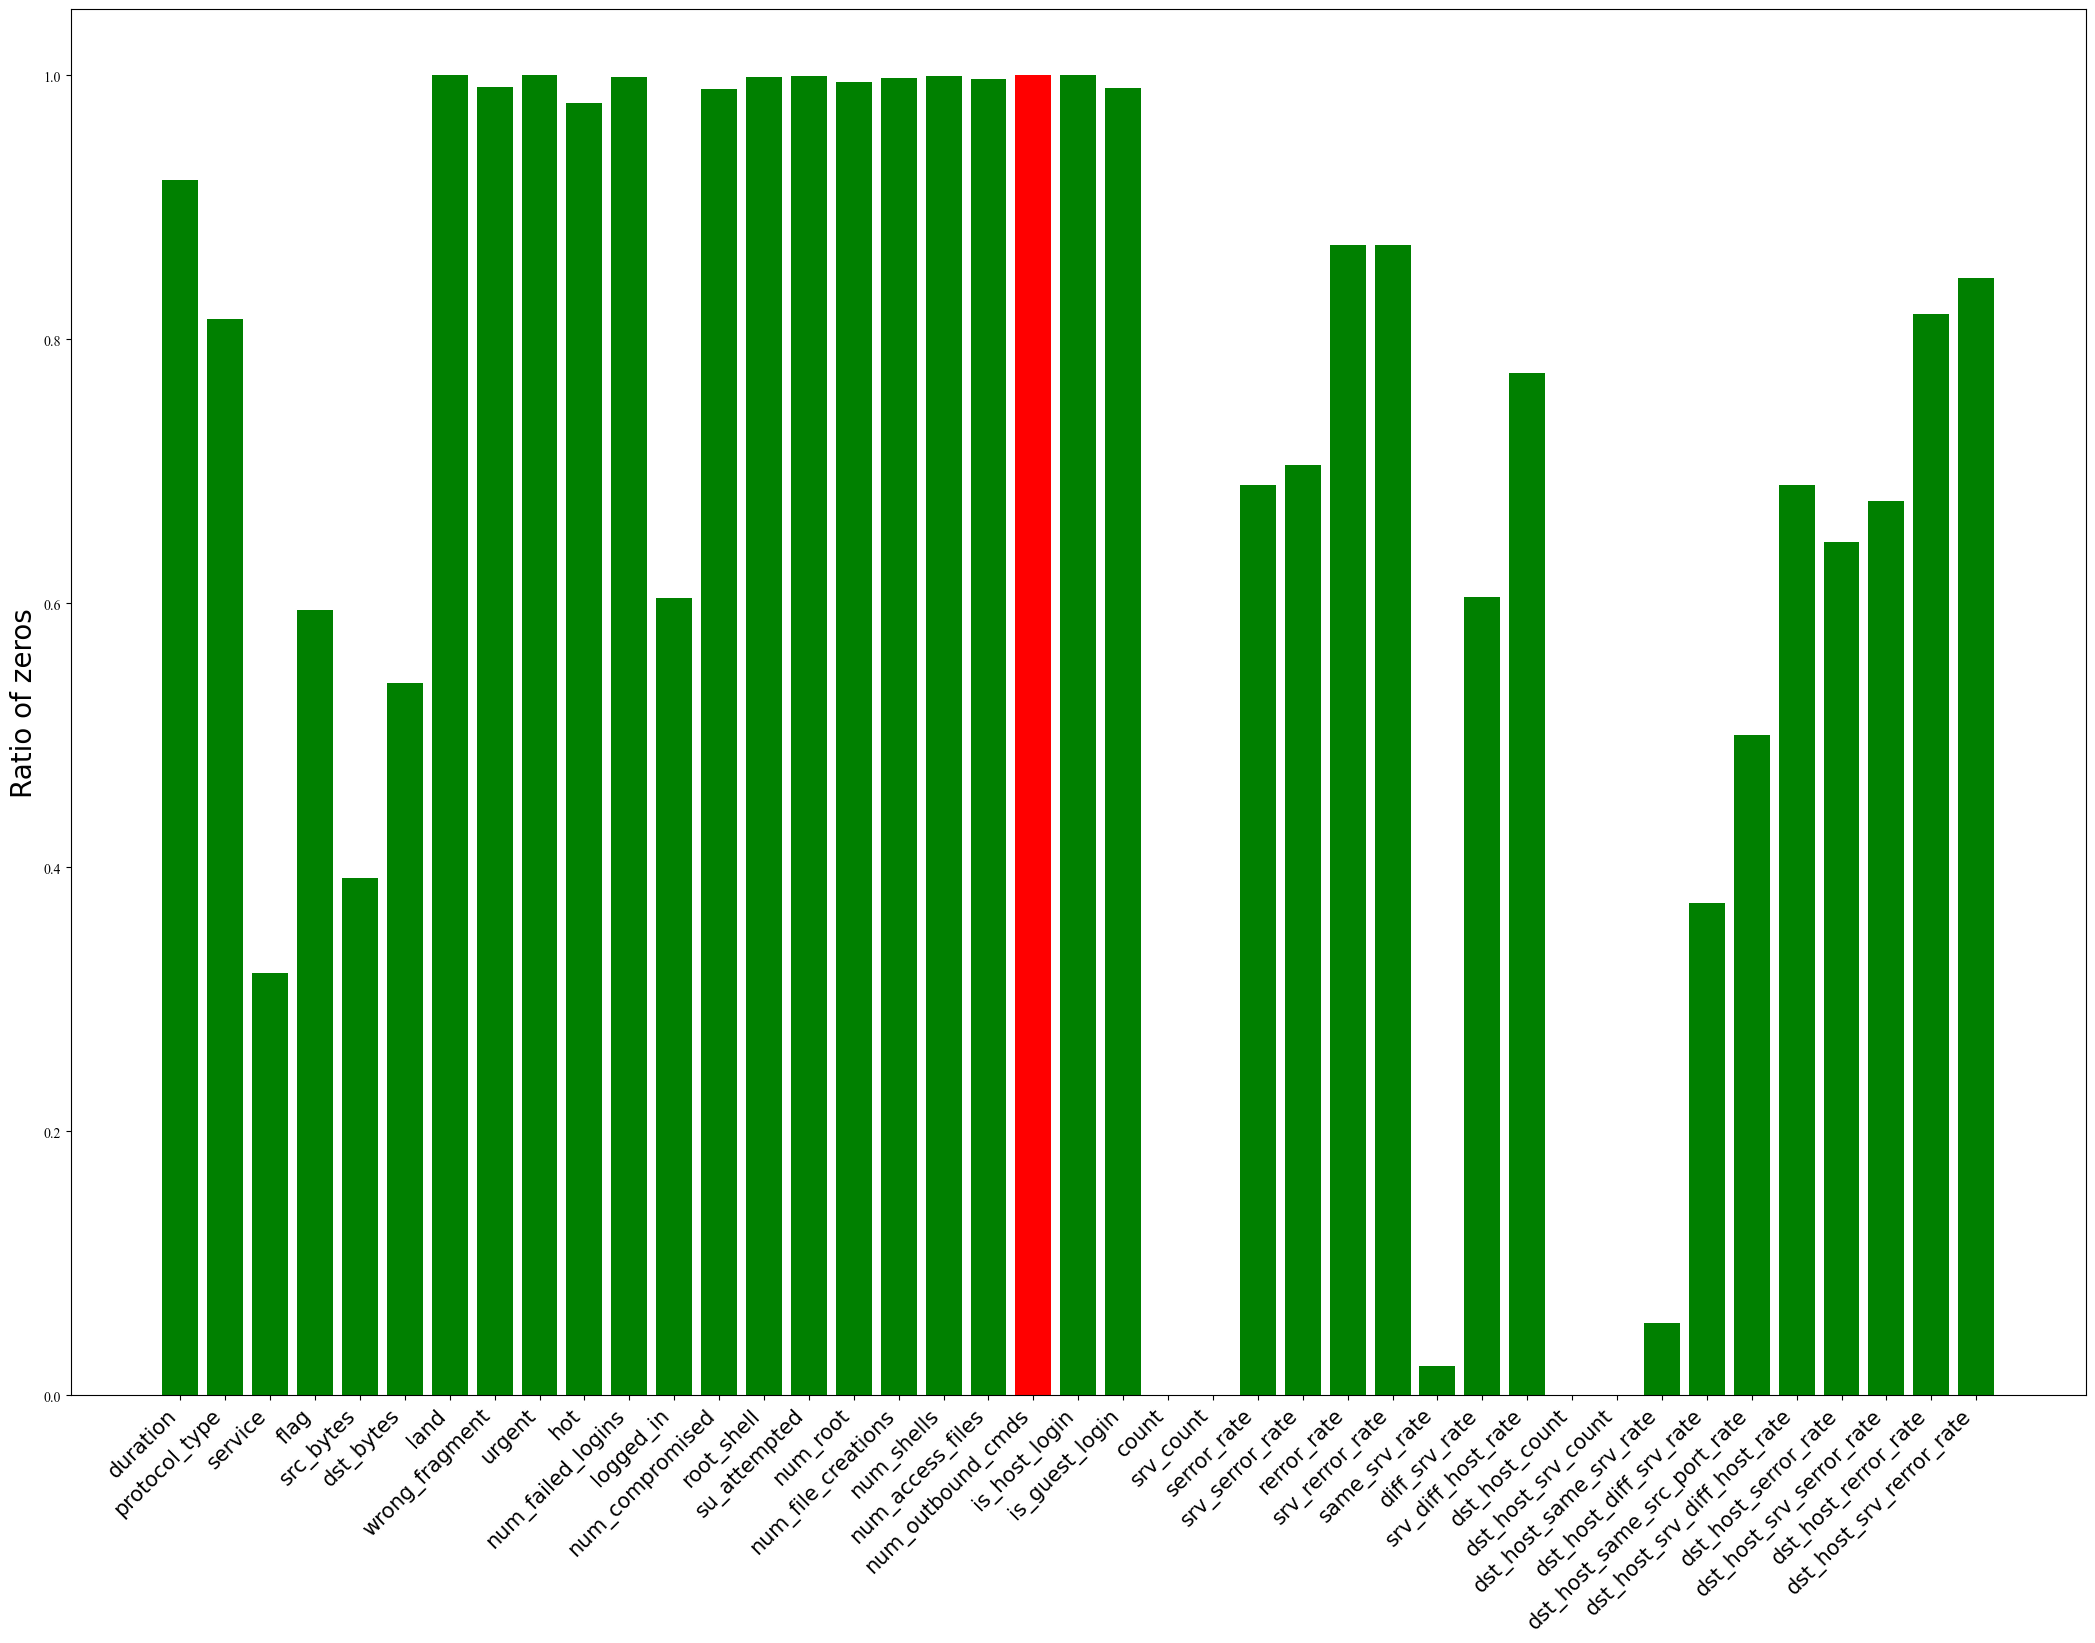

In [18]:
plt.figure(figsize=(26, 18))
y_pos = range(len(X))
plt.bar(y_pos, Y, color=colors)
# Rotation of the bars names
plt.xticks(y_pos, X, rotation=45, ha='right', size=15)
plt.yticks(fontsize=20, fontname='Times New Roman')
plt.ylabel('Ratio of zeros', fontsize=20)
plt.savefig('Statistical Feature Selection',dpi=500);

## Data Preprocessing

### Label Encoding

In [4]:
# Use Label Encoding for categorical features (including 'class')

# Encode class label with LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Define the columns to LabelEncode
categorical_columns=['protocol_type', 'service', 'flag']

# Encode categorical columns using LabelEncoder
label_encoder = preprocessing.LabelEncoder()
for column in categorical_columns:
    KDDTrain[column] = label_encoder.fit_transform(KDDTrain[column])
    KDDTest[column] = label_encoder.transform(KDDTest[column])

### Data Cleaning

In [5]:
# We replace all instances with a value of 2 to 1 because the feature should be a binary value (0 or 1)
KDDTrain['su_attempted'] = KDDTrain['su_attempted'].replace(2, 1)
KDDTest['su_attempted'] = KDDTest['su_attempted'].replace(2, 1)

### Feature Elimination

In [6]:
# We drop 'num_outbound_cmds' from both training and testing dataset because every instance is equal to 0 in both datasets
KDDTrain.drop("num_outbound_cmds",axis=1,inplace=True)
KDDTest.drop("num_outbound_cmds",axis=1,inplace=True)

### MinMax Normalization

In [7]:
# Define the columns to scale
columns_to_scale=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']

# Scale numerical columns using MinMax
scaler = MinMaxScaler()
for column in columns_to_scale:
    KDDTrain[column] = scaler.fit_transform(KDDTrain[[column]])
    KDDTest[column] = scaler.transform(KDDTest[[column]])

### Define Intrusion Class

In [23]:
# Distribution of attack classes in training dataset
KDDTrain['class'].value_counts()

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [24]:
# Distribution of attack classes in testing dataset
KDDTest['class'].value_counts()

class
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

In [8]:
# changing training attack labels to their respective attack class for binary classification
KDDTrain['class'].replace(['neptune', 'smurf', 'back', 'teardrop', 'pod', 'land', 'satan', 'ipsweep', 'portsweep', 'nmap',
                                 'warezclient', 'guess_passwd', 'warezmaster', 'imap', 'ftp_write', 'multihop', 'phf','spy', 'buffer_overflow', 'rootkit', 'loadmodule','perl'],'intrusion',inplace=True) #22

In [9]:
# changing test attack labels to their respective attack class for multiclass classification
KDDTest['class'].replace(['neptune','apache2', 'processtable', 'smurf', 'back','mailbomb', 'pod', 'teardrop', 'land','worm', 'udpstorm',
                                'mscan', 'satan', 'saint', 'portsweep', 'ipsweep', 'nmap', 'guess_passwd', 'warezmaster', 'snmpguess', 'snmpgetattack',
                                 'httptunnel', 'multihop', 'named', 'sendmail', 'xlock', 'xsnoop', 'ftp_write', 'phf', 'imap',
                                'buffer_overflow', 'ps', 'rootkit', 'xterm', 'loadmodule', 'perl', 'sqlattack'],'intrusion',inplace=True) #37

In [10]:
#Find and replace method
#replacing values
KDDTrain['class'].replace(['intrusion','normal'],[1, 0], inplace=True) #arbitrary assignment
KDDTest['class'].replace(['intrusion','normal'],[1, 0], inplace=True) #arbitrary assignment

In [11]:
# Distribution of attack classes in training dataset
KDDTrain['class'].value_counts()

class
0    67343
1    58630
Name: count, dtype: int64

In [12]:
# Distribution of attack classes in testing dataset
KDDTest['class'].value_counts()

class
1    12833
0     9711
Name: count, dtype: int64

In [13]:
KDDTrain.to_csv('training.csv', index=False)
KDDTest.to_csv('testing.csv', index=False)